<div>
    <em><h1>Health Marketing</h1></em>
    <img width="10%" height="10%" src='pics/aiHealth_01.jpg'/>
    
    
</div>
<div>
    <p>
    <em>Stap 5:</em>
    <br>
    <em>Data interpretatie: modelleren</em>
        <br>
    <em>Author: Hans Olthoff</em>
    </p>    
</div>

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

Get data

In the db are 3 tables: df1, df2, df3

- df1 is the complete set (NaNs replaced by mean value)
- df2 has extra colum BMI
- df3 has extra colum BMI AND outliers are removed

In [ ]:
dbConnection = sqlite3.connect('../rest_server_new/medisch_centrum_randstad/db.sqlite3')

In [ ]:
df = pd.read_sql_query(f"SELECT * FROM {'df2'}", dbConnection)

In [ ]:
dbConnection.close()

In [27]:
df = pd.read_csv('data/df2.csv', index_col=0)

Fit to model

In [48]:
# Check of index is removed
df.keys()

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol',
       'lifespan', 'sugar', 'BMI'],
      dtype='object')

In [29]:
# divide dataset into X predictors and y target
# X = df.drop(['index', 'lifespan'], axis=1)
X = df.drop(['lifespan'], axis=1)
y = df[['lifespan']]

# split data 80% training and 20% test with random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# variant waarbij mass en length zijn verwijderd
# divide dataset into X predictors and y target
# X = df.drop(['index', 'mass', 'length', 'lifespan'], axis=1)
# y = df[['lifespan']]

# # split data 80% training and 20% test with random state for reproducability
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) 

LinearRegression()

RSME zegt hoeveel zit het gemiddelde van de lifespan tov wat het model er van maakt. Dus hoe lager de RSME dan is het model beter want een lagere error is een betere voorspelling.


Mogelijke vervolgstappen zijn:
- je model testen
- lse en r squared bekijken
- decision tree en random forest proberen
- bovenstaande met de twee andere datsets doorlopen





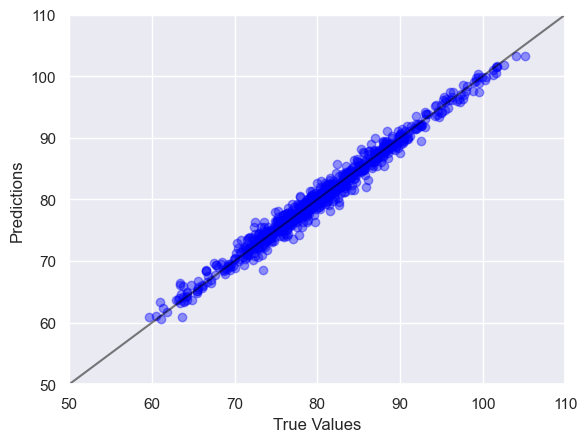

In [31]:
# y_test is called p_test, because y_test already exists
p_test = regr.predict(X_test)
 
plt.scatter(y_test,p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
 
# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

LSE or Least Square Error to make the error as small as possible. That is what happens with FIT
The RMSE is the check on the fit.

In [32]:
score = regr.score(X_test,y_test)
# hier gebruik je de testdata om te checken

In [33]:
display(score)
# dit geeft R^2 en dat is de accuraatheid van het model

0.9812233992575078

R^2 or R squared to look at the quality of the fit

RMSE or Root Mean Squared Error is hoe ver prediction afzit van de werkelijke waarde.


In [34]:
# X_test heeft geen lifespan, dus drop hoeft niet
# X_test.lifespan = y_test


p_test = regr.predict(X_test)
 
mse = mean_squared_error(y_test, p_test)

rmse = (math.sqrt(mse))
print(rmse)

1.0783174246450424


In [54]:
# y = a1x1 + a2x2 + ... b0 met b0 is de optelsom van alle b waarden

# The coefficients a1, a2, a3, etc
print('Coefficients: \n', regr.coef_)
print(f'b0 would be:',regr.predict([[0,0,0,0,0,0,0,0]]))


Coefficients: 
 [[ 1.00004713 -0.05825738  0.05733271  0.80966638 -0.26425189 -0.23217845
  -0.0690778  -0.25992269]]
b0 would be: [[12.13387414]]


/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
# b0 direct berekenen:
display(regr.intercept_)

array([12.13387414])

In [46]:
#Test met test_invoer: daarvoor neem je de gem waarden. je kan bij invoer ook de min en max aangeven

genetic = 82.28 # min=63.90 max=102.20
length = 183.89 # min = 154.00 max = etc
mass = 92.28
alcohol = 2.27
sugar = 6.49
smoking = 9.81
exercise = 2.40
BMI = round(mass/((length/100)**2))

In [40]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,80.177693,6.487169,27.682076
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,7.840508,2.708622,8.711789
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,57.000000,0.700000,11.300000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000,20.900000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000,26.500000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000,33.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,105.100000,13.800000,65.900000


In [43]:
# Test met gemiddelde waarden:

lifespan_predict = regr.predict([[genetic, length, mass, alcohol, sugar, smoking, exercise, BMI]])
display(lifespan_predict)

/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[79.65704281]])

Twee andere manieren om lifespan_predict te bepalen adhv X_input

In [ ]:
X_input = [genetic, length, mass, exercise, smoking, alcohol, sugar, BMI]
# dit moet een dict zijn met de {'colum':value, etc}

In [49]:
#andere manier: X_input bepalen obv de coefficient
# de coeff is de a in y = ax + b en b0 is de optesom van alle individuele b's in y = ax +b
# y = a1x1 + a2x2 +... b0

# lifespan = genetic*1.00 + length*(-0.06) + etc

In [ ]:
# df.keys().drop('index') * regr.coef_[0]


# list(df.keys().drop('index'))
# list(regr.coef_[0])

# (list(df.keys().drop('index')))*(list(regr.coef_[0]))
lifespan =  X_input * list(regr.coef_[0])